# **13장. 데이터 분석 프로젝트**

In [ ]:
#데이터 분석 과정
# 1) 분석 대상에 대한 문제를 정의한다.
# - "혼인율이 낮아지면, 출산율도 낮아질 것이다" 와 같이 정량적으로 분석할 수 있어야함.
# 2) 데이터를 수집한다.
# 3) 수집한 데이터를 전처리하여 분석에 활용할 수 있는 형태로 만든다.
# 4) 데이터 분석을 수행한다.
# 5) 분석 결과를 시각화한다.

In [ ]:
#많이 본 뉴스 데이터 수집

#크롤링 대상 분석
#CSS Selector를 활용하여 객체에 접근
#개발자 도구 -> 검사할 페이지 요소 선택(Ctrl + Shift + C) -> 기사 제목 클릭 -> 표시된 영역 마우스 오른쪽 -> 복사 -> selector 복사
#기사 제목 selector 예시)
#container > div > div > div > div.news_top50 > ul > li:nth-child(i) > a > span.text > strong
#기사 작성일 selector 예시)
#container > div > div > div > div.news_top50 > ul > li:nth-child(i) > a > span.text > span.date > span:nth-child(2)
#분류 selector 예시)
#container > div > div > div > div.news_top50 > ul > li:nth-child(i) > a > span.text > span.date > span:nth-child(1)

In [ ]:
#셀레니움 환경 설정 및 크롤링

#셀레니움 패키지 설치

import sys

!sudo add-apt-repository ppa:saiarcot895/chromium-beta
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser

!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
sys.path.insert(0, 'usr/lib/chromuim-browser/chromedriver')

In [5]:
#셀레니움 실행 환경 설정
#가상 브라우저인 크롬 드라이버를 사용하고, 결과를 바로 표시하지 않는 headless 옵션을 설정한다.

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

webdriver_service = Service('/usr/bin/chromedriver')
driver = webdriver.Chrome(service = webdriver_service, options = options)
#driver 객체 : 웹페이지에 접속하거나 웹페이지 요소(Elements)에 접근할 때 driver을 통함
url = 'https://www.korea.kr/news/top50List.do'
driver.get(url) #URL 주소를 변수 url에 담고 get()함수로 객체 driver를 통해 웹페이지에 접속함

In [6]:
#크롤링한 데이터를 리스트에 저장

columns = ['순위', '기사 제목', '분류', '기사 작성일']
rank = []
title = []
journal = []
date = []

for i in range(1, 51) :
  rank.append(i)
  title.append(driver.find_element(By.CSS_SELECTOR, '#container > div > div > div > div.news_top50 > ul > li:nth-child(' + str(i) + ') > a > span.text > strong').text)
  journal.append(driver.find_element(By.CSS_SELECTOR, '#container > div > div > div > div.news_top50 > ul > li:nth-child(' + str(i) + ') > a > span.text > span.date > span:nth-child(1)').text)
  date.append(driver.find_element(By.CSS_SELECTOR,'#container > div > div > div > div.news_top50 > ul > li:nth-child(' + str(i) + ') > a > span.text > span.date > span:nth-child(2)').text)

In [7]:
#리스트를 데이터프레임으로 변환
import pandas as pd

df = pd.DataFrame({columns[0] : rank,
                   columns[1] : title,
                   columns[2] : journal,
                   columns[3] : date}, columns = columns)
df.head()

,순위,기사 제목,분류,기사 작성일
0,1,‘청년 주택드림 청약통장’ 내년 출시…주담대 연 2.2% 적용,정책뉴스,2023.11.24
1,2,지방 공무원 → 국가직 전환 깐깐해진다…1개 이상 시험 필수,정책뉴스,2023.11.28
2,3,재외국민 비대면 진료 허용…신산업 20개 규제 혁신 속도,정책뉴스,2023.11.27
3,4,"윤 대통령 “엑스포 유치 실패, 제 부족의 소치…국민 실망시켜 죄송”",정책뉴스,2023.11.29
4,5,내년 노인일자리 14만 7000개 ‘더’ 확대…총 103만 개 제공,정책뉴스,2023.11.28


In [8]:
#데이터프레임을 CSV 파일로 저장
df.to_csv('top50_news.csv', index = False)

In [ ]:
#많이 본 뉴스 워드클라우드

#한글 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [10]:
#기사 제목 텍스트 준비

import csv

f = open('top50_news.csv', 'r')
rdr = csv.reader(f)
f.close

title = ''
for line in rdr:
  title = title + ' ' + line[1]
print(title)

 기사 제목 ‘청년 주택드림 청약통장’ 내년 출시…주담대 연 2.2% 적용 지방 공무원 → 국가직 전환 깐깐해진다…1개 이상 시험 필수 재외국민 비대면 진료 허용…신산업 20개 규제 혁신 속도 윤 대통령 “엑스포 유치 실패, 제 부족의 소치…국민 실망시켜 죄송” 내년 노인일자리 14만 7000개 ‘더’ 확대…총 103만 개 제공 “문화누리카드를 만난 후 삶의 변화가 찾아왔어요” 올겨울 미세먼지 더 짙다…석탄발전 감축·노후차량 운행제한 확대 상추·애호박·오이, 할인지원품목에 포함…30일부터 최대 40% ↓ 12월 한 달간 가계대출 중도상환수수료 면제…취약차주 면제도 연장 “혁신적 R&D에 마음껏 도전을”…성공·실패 구분 짓는 평가등급 폐지 올겨울 난방비 이렇게 절약해 보세요! 국세청, 불법사금융 척결에 역량 총동원…163명 전국 동시 조사 ‘수산대전 연말 특별전’…명태 등 국내산 수산물 최대 60% 할인 한-영 경제·금융 분야 협력채널 신설…“우호적 투자 환경 조성” Q&A로 알아보는 ‘뇌졸중’ 가습기살균제 구제급여 지급 대상자 추가…총 5417명 인정 2030년까지 농업 분야 ODA 예산 2배로…식량직접지원 확대 겨울철 위험한 고혈압, 주의사항과 증상 알아보기 지진위기경보 ‘경계’ 단계…정부, 국가기반 서비스 철저 점검 영국·프랑스 순방 마무리…경제협력 새 틀 마련·부산엑스포 유치 총력 중소기업에는 우수인력 공급을…청년은 인재 성장 기회 제공 ‘식품지식 능력고사’, 제 점수는요? 겨울 대설·한파 ‘상시 비상대응체계’ 유지…우려지역 집중관리 청소년 유해업소서 PC방 제외…행안부, 중앙부처 규제 58건 개선 ‘제이팝(J-POP)’의 귀환…왜? “청와대서 특별한 겨울밤 산책을~”…내달 6~11일 야간 개방 [김소통의 1분정책] 정년 앞둔 그대여 아무 걱정하지 말아요~ 우리 계속고용합시다 ‘고령자 계속고용장려금’ 2세이하 자녀 가구 신생아 특별공급 신설…연 7만 가구 공급 겨울철 노로바이러스 식중독 주의…어패류 등 완전히 익혀먹어야 공정위가 소형 의류건조기 비교정보 

In [11]:
#문자열 슬라이싱
#인덱스 0~5를 제외하고 6부터 슬라이싱 하기

title = title[6:]
print(title)

 ‘청년 주택드림 청약통장’ 내년 출시…주담대 연 2.2% 적용 지방 공무원 → 국가직 전환 깐깐해진다…1개 이상 시험 필수 재외국민 비대면 진료 허용…신산업 20개 규제 혁신 속도 윤 대통령 “엑스포 유치 실패, 제 부족의 소치…국민 실망시켜 죄송” 내년 노인일자리 14만 7000개 ‘더’ 확대…총 103만 개 제공 “문화누리카드를 만난 후 삶의 변화가 찾아왔어요” 올겨울 미세먼지 더 짙다…석탄발전 감축·노후차량 운행제한 확대 상추·애호박·오이, 할인지원품목에 포함…30일부터 최대 40% ↓ 12월 한 달간 가계대출 중도상환수수료 면제…취약차주 면제도 연장 “혁신적 R&D에 마음껏 도전을”…성공·실패 구분 짓는 평가등급 폐지 올겨울 난방비 이렇게 절약해 보세요! 국세청, 불법사금융 척결에 역량 총동원…163명 전국 동시 조사 ‘수산대전 연말 특별전’…명태 등 국내산 수산물 최대 60% 할인 한-영 경제·금융 분야 협력채널 신설…“우호적 투자 환경 조성” Q&A로 알아보는 ‘뇌졸중’ 가습기살균제 구제급여 지급 대상자 추가…총 5417명 인정 2030년까지 농업 분야 ODA 예산 2배로…식량직접지원 확대 겨울철 위험한 고혈압, 주의사항과 증상 알아보기 지진위기경보 ‘경계’ 단계…정부, 국가기반 서비스 철저 점검 영국·프랑스 순방 마무리…경제협력 새 틀 마련·부산엑스포 유치 총력 중소기업에는 우수인력 공급을…청년은 인재 성장 기회 제공 ‘식품지식 능력고사’, 제 점수는요? 겨울 대설·한파 ‘상시 비상대응체계’ 유지…우려지역 집중관리 청소년 유해업소서 PC방 제외…행안부, 중앙부처 규제 58건 개선 ‘제이팝(J-POP)’의 귀환…왜? “청와대서 특별한 겨울밤 산책을~”…내달 6~11일 야간 개방 [김소통의 1분정책] 정년 앞둔 그대여 아무 걱정하지 말아요~ 우리 계속고용합시다 ‘고령자 계속고용장려금’ 2세이하 자녀 가구 신생아 특별공급 신설…연 7만 가구 공급 겨울철 노로바이러스 식중독 주의…어패류 등 완전히 익혀먹어야 공정위가 소형 의류건조기 비교정보 알려드려요!

In [14]:
#워드클라우드로 시각화

#라이브러리 설치
!pip install konlpy

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 38.2 MB/s eta 0:00:00


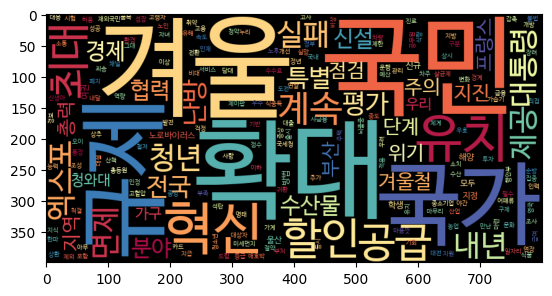

In [15]:
#워드클라우드 생성

#문자열 분석하기
okt = Okt()
nouns = okt.nouns(title)
words = [n for n in nouns if len(n) > 1]
c = Counter(words)

#워드클라우드 생성하기
wc = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',\
               scale = 2.0, colormap = 'Spectral')
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [ ]:
#지역별 인구 증감률 분석

#인구 증감률 분석
#통계청 서비스 국가통계포털(KOSIS)

In [22]:
#CSV 데이터 읽기

import pandas as pd
df = pd.read_csv('행정구역_시군구_별__성별_인구수.csv', encoding = 'utf-8')

df

,행정구역(시군구)별,2013.01,2013.02,2013.03,2013.04,2013.05,2013.06,2013.07,2013.08,2013.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,행정구역(시군구)별,총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),...,총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명)
1,전국,50965180,50991003,51003843,51018468,51034494,51047880,51064841,51081507,51098531,...,51610695,51592660,51583722,51578178,51574446,51558441,51466658,51459626,51450829,51439038
2,서울특별시,10195064,10196434,10192057,10185955,10181807,10176560,10172002,10168997,10166691,...,9506778,9500480,9496887,9494807,9493211,9488454,9450768,9443722,9436836,9428372
3,부산광역시,3538191,3539455,3538285,3537758,3536426,3534500,3532994,3531796,3531643,...,3343504,3340214,3338167,3336737,3334595,3331444,3323826,3322286,3320276,3317812
4,대구광역시,2504945,2505040,2504623,2504888,2505083,2503728,2503604,2503400,2503679,...,2380494,2378573,2376676,2375306,2374120,2371936,2367735,2366852,2365619,2363691
5,인천광역시,2846899,2850543,2853489,2856667,2859335,2861722,2864951,2867429,2870125,...,2952699,2953260,2955167,2957066,2960580,2963117,2960097,2962388,2964820,2967314
6,광주광역시,1470061,1470969,1470979,1471324,1471801,1471867,1472357,1472807,1473229,...,1438463,1436916,1436012,1435378,1434703,1434397,1432856,1432651,1432049,1431050
7,대전광역시,1525888,1527383,1527857,1528578,1529085,1529655,1530226,1530908,1531418,...,1450057,1449360,1448933,1448401,1448182,1448240,1446602,1446863,1446749,1446072
8,울산광역시,1148130,1148713,1150215,1150708,1151340,1152039,1152765,1154208,1154382,...,1118010,1117204,1116482,1115609,1114753,1113458,1112191,1111707,1111371,1110663
9,세종특별자치시,113911,115269,115955,116345,116842,117012,117369,117939,118273,...,377296,378196,379340,380215,380889,381439,381925,382258,382770,383591


In [23]:
#지역별 월 증감 인구수 계산

#지역별 월 증감 인구수

columns = list(df.columns)
#print(columns)
del columns[1]
popDiff = []

for i in range(2, len(df)):
  row = [df.loc[i][0]]
  for j in range(2, len(df.loc[i])):
    pop = int(df.loc[i][j] - int(df.loc[i][j-1]))
    row.append(pop)
  popDiff.append(row)

dfPopDiff = pd.DataFrame(popDiff, columns = columns)
dfPopDiff.to_csv('populationDiff.csv', encoding = 'cp949')

['행정구역(시군구)별', '2013.01', '2013.02', '2013.03', '2013.04', '2013.05', '2013.06', '2013.07', '2013.08', '2013.09', '2013.10', '2013.11', '2013.12', '2014.01', '2014.02', '2014.03', '2014.04', '2014.05', '2014.06', '2014.07', '2014.08', '2014.09', '2014.10', '2014.11', '2014.12', '2015.01', '2015.02', '2015.03', '2015.04', '2015.05', '2015.06', '2015.07', '2015.08', '2015.09', '2015.10', '2015.11', '2015.12', '2016.01', '2016.02', '2016.03', '2016.04', '2016.05', '2016.06', '2016.07', '2016.08', '2016.09', '2016.10', '2016.11', '2016.12', '2017.01', '2017.02', '2017.03', '2017.04', '2017.05', '2017.06', '2017.07', '2017.08', '2017.09', '2017.10', '2017.11', '2017.12', '2018.01', '2018.02', '2018.03', '2018.04', '2018.05', '2018.06', '2018.07', '2018.08', '2018.09', '2018.10', '2018.11', '2018.12', '2019.01', '2019.02', '2019.03', '2019.04', '2019.05', '2019.06', '2019.07', '2019.08', '2019.09', '2019.10', '2019.11', '2019.12', '2020.01', '2020.02', '2020.03', '2020.04', '2020.05', '2020.

In [ ]:
#지역별 월 인구 증감률 계산

#증감률 = (현재 월 인구수 - 직전 월 인구수) / 직전 월 인구수 * 100.0

columns = list(df.columns)
del columns[1]

popIncreaseRate = []

for i in range(2, len(df)):
  row = [df.loc[i][0]]
  for j in range(2, len(df.loc[i])):
    pop = float((int(df.loc[i][j]) - int(df.loc[i][j-1])) / int(df.loc[i][j-1])) * 100.0
    row.append(pop)
  popIncreaseRate.append(row)

dfPopIncreaseRate = pd.DataFrame(popIncreaseRate,  columns = columns)
dfPopIncreaseRate.to_csv('populationIncreaseRate.csv', encoding = 'cp949', index = False)
dfPopIncreaseRate

In [ ]:
#지역별 증감 인구수 그래프

#CSV 데이터 읽기

import pandas as pd
df = pd.read_csv('populationDiff.csv', encoding = 'cp949')

popDiff = []
for i in range(0, len(df)):
  popDiff.append(list(df.loc[i]))

popDiff

In [47]:
#축과 데이터 준비

#x축에 표시할 값
x_values = []
for i in range(1, 7):
  yyyymm = '20220' + str(i)
  x_values.append(yyyymm)

#월 증감 인구수를 지역별 변수 y에 대입하기
y_seoul = popDiff[0][108:114]
y_bs = popDiff[1][108:114]
y_dg = popDiff[2][108:114]
y_ic = popDiff[3][108:114]
y_gj = popDiff[4][108:114]
y_dj = popDiff[5][108:114]
y_us = popDiff[6][108:114]
y_sj = popDiff[7][108:114]
y_gg = popDiff[8][108:114]
y_gw = popDiff[9][108:114]
y_cb = popDiff[10][108:114]
y_cn = popDiff[11][108:114]
y_jb = popDiff[12][108:114]
y_jn = popDiff[13][108:114]
y_gb = popDiff[14][108:114]
y_gn = popDiff[15][108:114]
y_jj = popDiff[16][108:114]

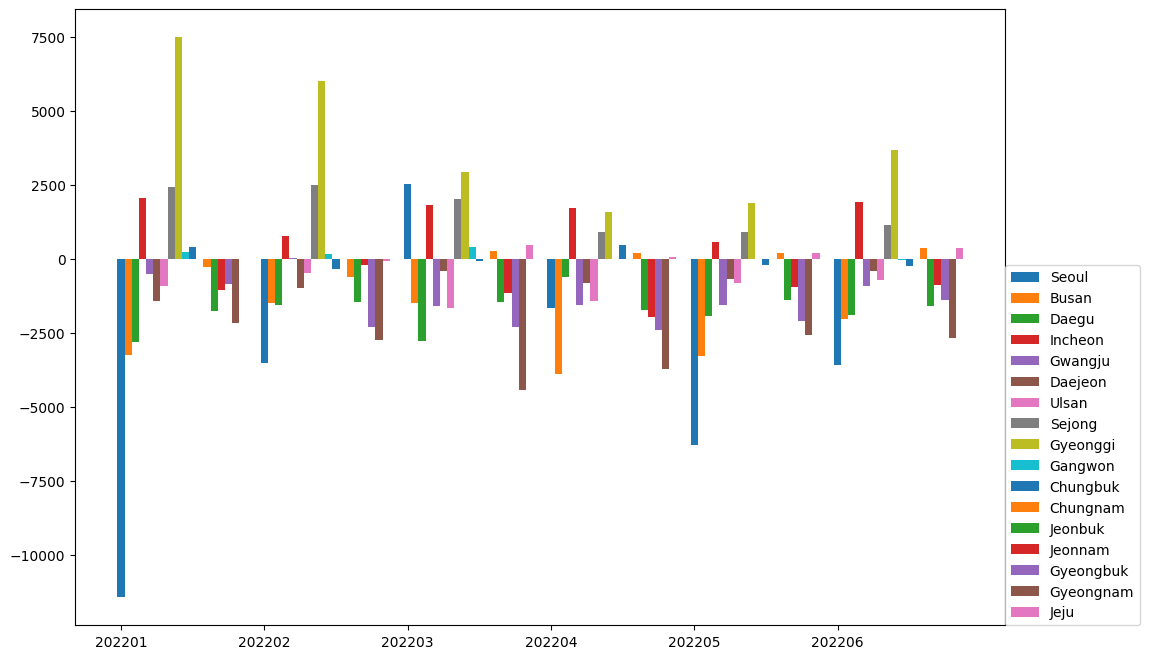

In [49]:
#막대 그래프 그리기

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))
ax = plt.subplot()
bar_width = 0.05

x = np.arange(6)
ax.set_xticks(x)
ax.set_xticklabels(x_values)

p1 = plt.bar(x, y_seoul, bar_width)
p2 = plt.bar(x + bar_width, y_bs , bar_width)
p3 = plt.bar(x + bar_width*2, y_dg , bar_width)
p4 = plt.bar(x + bar_width*3, y_ic , bar_width)
p5 = plt.bar(x + bar_width*4, y_gj , bar_width)
p6 = plt.bar(x + bar_width*5, y_dj , bar_width)
p7 = plt.bar(x + bar_width*6, y_us , bar_width)
p8 = plt.bar(x + bar_width*7, y_sj , bar_width)
p9 = plt.bar(x + bar_width*8, y_gg , bar_width)
p10 = plt.bar(x + bar_width*9, y_gw , bar_width)
p11 = plt.bar(x + bar_width*10, y_cb , bar_width)
p12 = plt.bar(x + bar_width*12, y_cn , bar_width)
p13 = plt.bar(x + bar_width*13, y_jb , bar_width)
p14 = plt.bar(x + bar_width*14, y_jn , bar_width)
p15 = plt.bar(x + bar_width*15, y_gb , bar_width)
p16= plt.bar(x + bar_width*16, y_gn , bar_width)
p17 = plt.bar(x + bar_width*17, y_jj  , bar_width)

plt.legend(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon', 'Ulsan', 'Sejong', 'Gyeonggi', \
            'Gangwon', 'Chungbuk', 'Chungnam', 'Jeonbuk', 'Jeonnam', 'Gyeongbuk', 'Gyeongnam', 'Jeju'], loc = (1.0,.0))

plt.show()